# Comparing the McMillan 2017 potentials to those of Barros 2016

We compare the best model from McMillan (2017, henceforth PJM17) with the best model of Barros (2016).
The comparisons are made for the sum of all components and then for each of the components separately.

> Note: All the internal workings are in units $M_\odot$, kpc, Myr (as in the C++ code).
Conversions for velocities can be applied with the helpful `GalaxyPotential` value `kpc_Myr_to_km_s` ($=977.77$)

In [75]:
# Some helpful imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

import mpl_aesth
mpl_aesth.adjust_rcParams('seaborn', use_kpfonts=True, dark_mode=False)

cl = mpl_aesth.c.copy()

# TODO: Change these so that we also have different colors for R and z profiles
# Linecolors
c = {
   'pjm': mpl_aesth.c[0],   # McMillan model
   'bar': mpl_aesth.c[5],   # Barros model
}
# Linestyles
ls = {
   'bf': '-',     # Best fit
   'nh': '--',    # No hole
   'nHIh': '-.',  # No HI hole
}

import norm
import physconst as pc
nm = norm.PhysNorm(m=pc.msun, x=pc.kpc, t=pc.Myr, temp=1., curr=1.)

Import GalaxyPotential class

In [76]:
from GalPot import GalaxyPotential

import PJM_functions as PJM
import Barros_functions as Bar

## Calculating the potential

Load the PJM and Barros models

In [77]:
PJM_Phi = GalaxyPotential("pot/PJM17_best.Tpot")
PJM_Phi_nh = GalaxyPotential("pot/PJM17_best_nohole.Tpot")
PJM_Phi_nHIh = GalaxyPotential("pot/PJM17_best_noHIhole.Tpot")

PJM_Rho = PJM.PJM_MW("pot/PJM17_best.Tpot")
PJM_Rho_nh = PJM.PJM_MW("pot/PJM17_best_nohole.Tpot")
PJM_Rho_nHIh = PJM.PJM_MW("pot/PJM17_best_noHIhole.Tpot")

Bar_Phi = Bar.BarrosMW("pot/BAR16_best.Bpot")
Bar_Phi_nh = Bar.BarrosMW("pot/BAR16_best_nohole.Bpot")
Bar_Phi_nHIh = Bar.BarrosMW("pot/BAR16_best_noHIhole.Bpot")

vconv = PJM_Phi.kpc_Myr_to_km_s
phi_plt_norm = vconv ** 2 / 1.e5   # in units of (100 km/s)^2

## The domain

In [78]:
R_min, R_max, nR = 0.1, 30, 1000
z_min, z_max, nz = 0.1, 30, 1000
R = np.linspace(R_min, R_max, nR)
z = np.linspace(z_min, z_max, nz)
RR, zz = np.meshgrid(R, z)
RR, zz = RR.ravel(), zz.ravel()
R0, z0 = np.zeros_like(R), np.zeros_like(z)
Rp01, Rp03, Rp1, Rp3, = 0.01 * np.ones_like(R), 0.03 * np.ones_like(R), 0.1 * np.ones_like(R), 0.3 * np.ones_like(R)
R1, R2, R4, R8 = 1. * np.ones_like(R), 2. * np.ones_like(R), 4. * np.ones_like(R), 8. * np.ones_like(R)

## Total potential

### Potential of $R$ along $z = 0$.

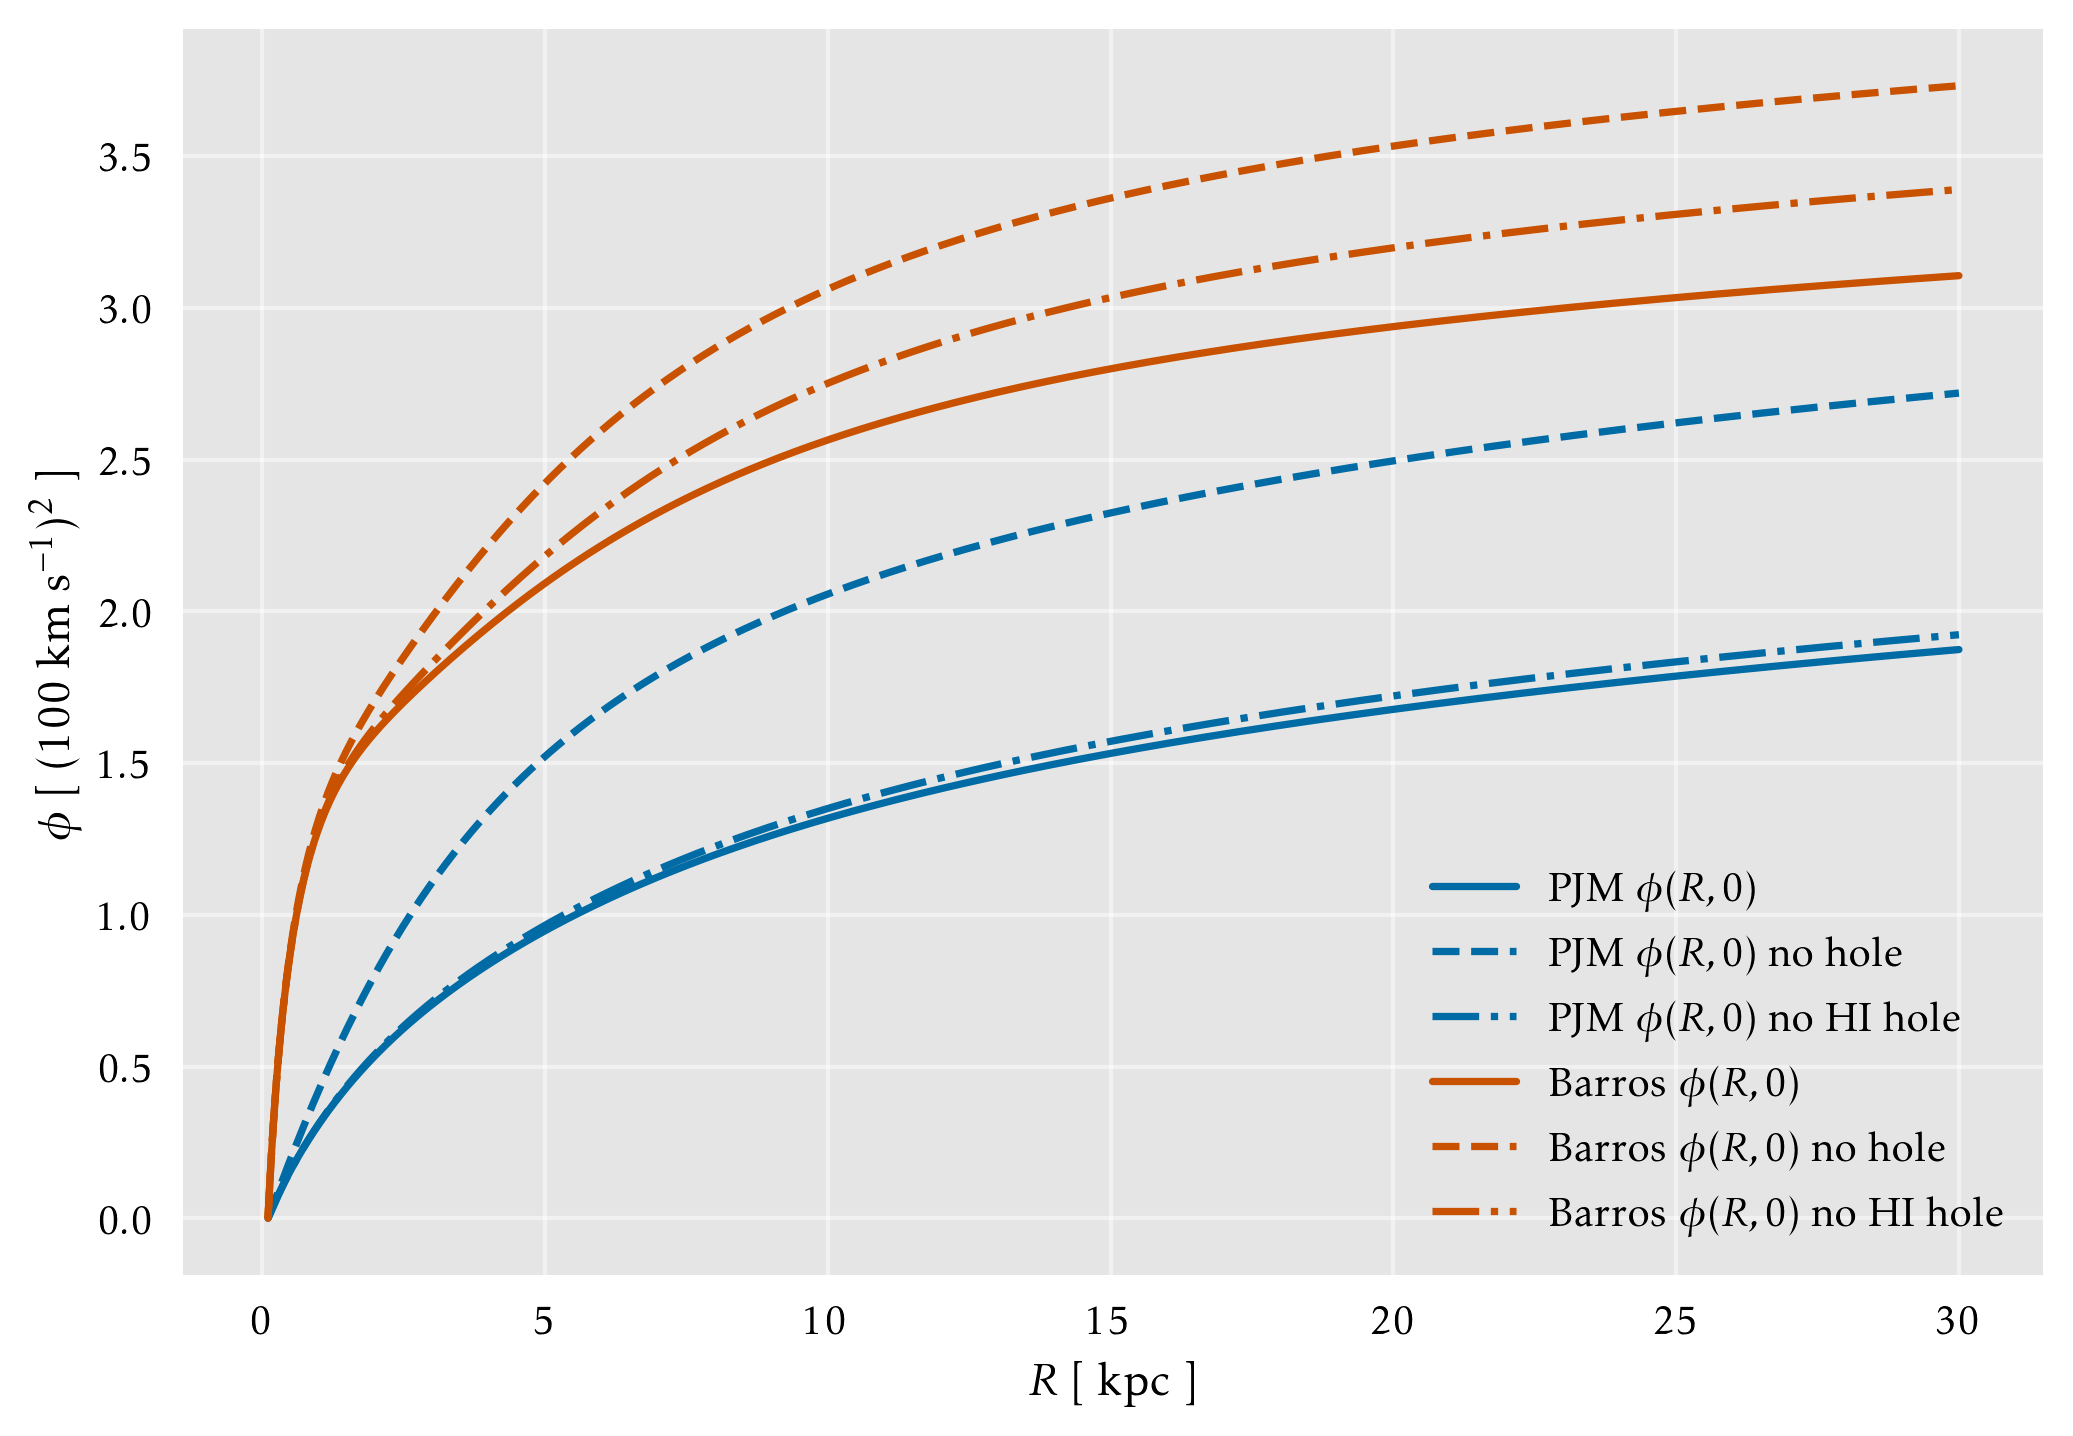

In [79]:
pjm_pot_r = PJM_Phi.Potential(R, z0) * phi_plt_norm
pjm_pot_r_nh = PJM_Phi_nh.Potential(R, z0) * phi_plt_norm
pjm_pot_r_nHIh = PJM_Phi_nHIh.Potential(R, z0) * phi_plt_norm
pjm_pot_r -= pjm_pot_r[0]
pjm_pot_r_nh -= pjm_pot_r_nh[0]
pjm_pot_r_nHIh -= pjm_pot_r_nHIh[0]
bar_pot_r = Bar_Phi.total_potential(R, z0) * phi_plt_norm
bar_pot_r_nh = Bar_Phi_nh.total_potential(R, z0) * phi_plt_norm
bar_pot_r_nHIh = Bar_Phi_nHIh.total_potential(R, z0) * phi_plt_norm
bar_pot_r -= bar_pot_r[0]
bar_pot_r_nh -= bar_pot_r_nh[0]
bar_pot_r_nHIh -= bar_pot_r_nHIh[0]
plt.plot(R, pjm_pot_r, c=c['pjm'], label=r'PJM $\phi(R, 0)$')
plt.plot(R, pjm_pot_r_nh, c=c['pjm'], ls=ls['nh'], label=r'PJM $\phi(R, 0)$ no hole')
plt.plot(R, pjm_pot_r_nHIh, c=c['pjm'], ls=ls['nHIh'], label=r'PJM $\phi(R, 0)$ no HI hole')
plt.plot(R, bar_pot_r, c=c['bar'], label=r'Barros $\phi(R, 0)$')
plt.plot(R, bar_pot_r_nh, c=c['bar'], ls=ls['nh'], label=r'Barros $\phi(R, 0)$ no hole')
plt.plot(R, bar_pot_r_nHIh, c=c['bar'], ls=ls['nHIh'], label=r'Barros $\phi(R, 0)$ no HI hole')
plt.xlabel(r'$R$ [ kpc ]')
plt.ylabel(r'$\phi$ [ (100 km s$^{-1}$)$^2$ ]')
plt.legend()
plt.show()

### Potential of $z$ along $R = 0$.

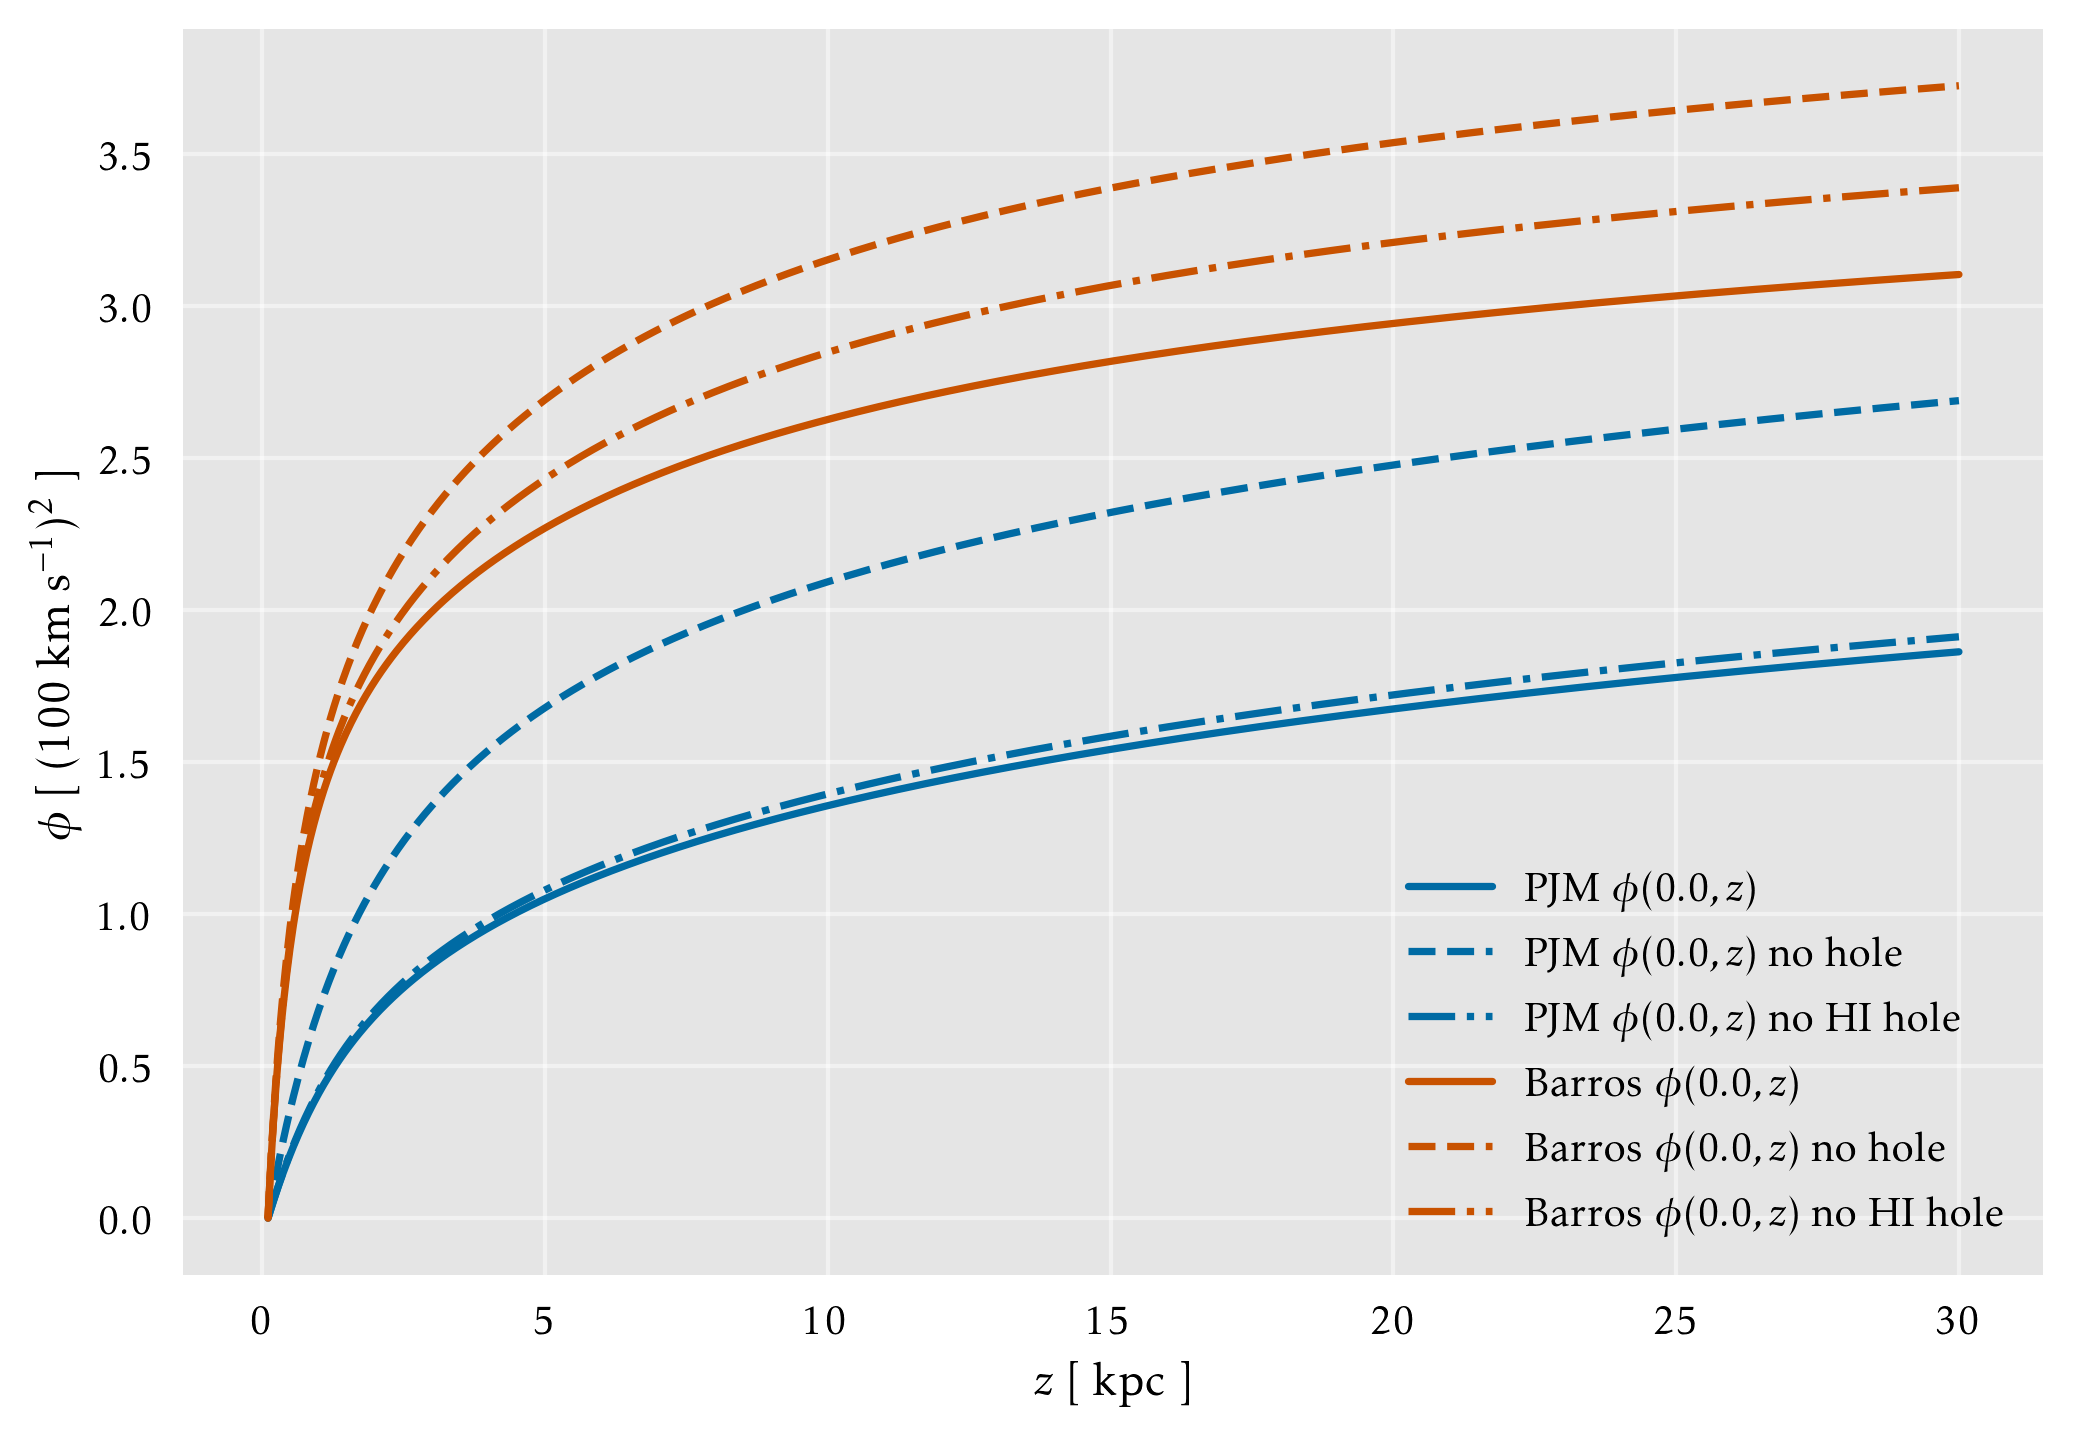

In [88]:
Rs = R0
pjm_pot_z = PJM_Phi.Potential(Rs, z) * phi_plt_norm
pjm_pot_z_nh = PJM_Phi_nh.Potential(Rs, z) * phi_plt_norm
pjm_pot_z_nHIh = PJM_Phi_nHIh.Potential(Rs, z) * phi_plt_norm
pjm_pot_z -= pjm_pot_z[0]
pjm_pot_z_nh -= pjm_pot_z_nh[0]
pjm_pot_z_nHIh -= pjm_pot_z_nHIh[0]
bar_pot_z = Bar_Phi.total_potential(Rs, z) * phi_plt_norm
bar_pot_z_nh = Bar_Phi_nh.total_potential(Rs, z) * phi_plt_norm
bar_pot_z_nHIh = Bar_Phi_nHIh.total_potential(Rs, z) * phi_plt_norm
bar_pot_z -= bar_pot_z[0]
bar_pot_z_nh -= bar_pot_z_nh[0]
bar_pot_z_nHIh -= bar_pot_z_nHIh[0]
plt.plot(z, pjm_pot_z, c=c['pjm'], label=rf'PJM $\phi({Rs[0]}, z)$')
plt.plot(z, pjm_pot_z_nh, c=c['pjm'], ls=ls['nh'], label=rf'PJM $\phi({Rs[0]}, z)$ no hole')
plt.plot(z, pjm_pot_z_nHIh, c=c['pjm'], ls=ls['nHIh'], label=rf'PJM $\phi({Rs[0]}, z)$ no HI hole')
plt.plot(z, bar_pot_z, c=c['bar'], label=rf'Barros $\phi({Rs[0]}, z)$')
plt.plot(z, bar_pot_z_nh, c=c['bar'], ls=ls['nh'], label=rf'Barros $\phi({Rs[0]}, z)$ no hole')
plt.plot(z, bar_pot_z_nHIh, c=c['bar'], ls=ls['nHIh'], label=rf'Barros $\phi({Rs[0]}, z)$ no HI hole')
plt.xlabel(r'$z$ [ kpc ]')
plt.ylabel(r'$\phi$ [ (100 km s$^{-1}$)$^2$ ]')
plt.legend()
plt.show()

## Derivatives wrt R & z of potential (comparison not yet scripted)

In [81]:
# dphidr = Phi.Potential_derivatives(RR, zz)

## Density as functions of R for different components

### Total density as a function of $R$

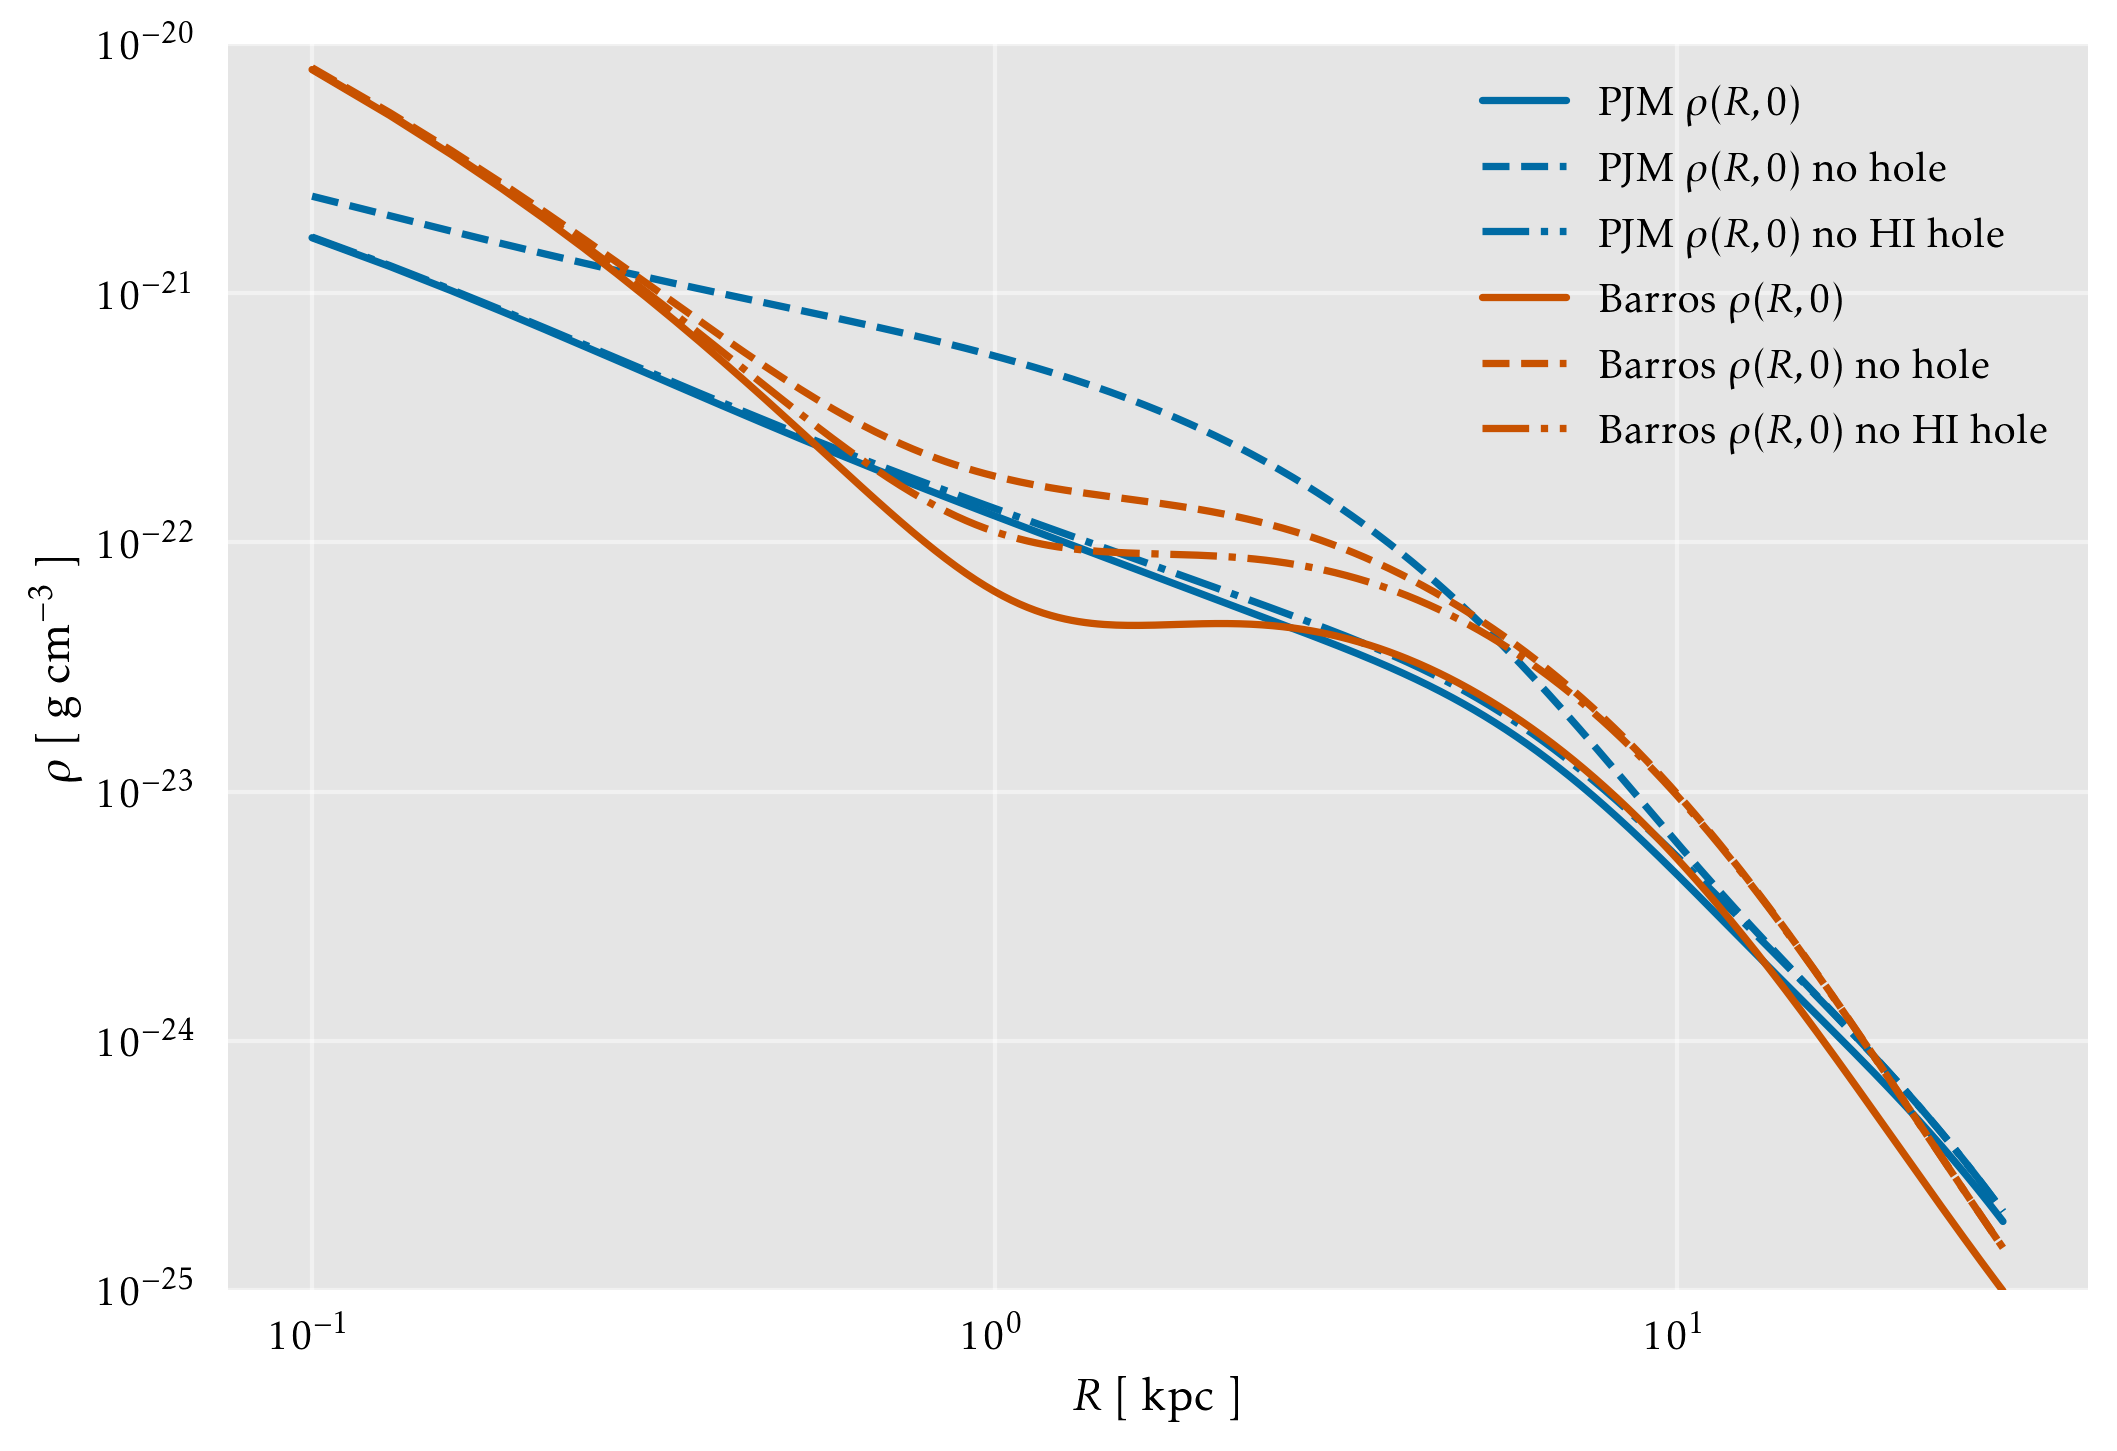

In [82]:
plt.plot(R, PJM_Phi.Density(R, z0) * nm.dens, c=c['pjm'], ls=ls['bf'], label=r'PJM $\rho(R, 0)$')
plt.plot(R, PJM_Phi_nh.Density(R, z0) * nm.dens, c=c['pjm'], ls=ls['nh'], label=r'PJM $\rho(R, 0)$ no hole')
plt.plot(R, PJM_Phi_nHIh.Density(R, z0) * nm.dens, c=c['pjm'], ls=ls['nHIh'], label=r'PJM $\rho(R, 0)$ no HI hole')
plt.plot(R, Bar_Phi.total_density(R, z0) * nm.dens, c=c['bar'], ls=ls['bf'], label=r'Barros $\rho(R, 0)$')
plt.plot(R, Bar_Phi_nh.total_density(R, z0) * nm.dens, c=c['bar'], ls=ls['nh'], label=r'Barros $\rho(R, 0)$ no hole')
plt.plot(R, Bar_Phi_nHIh.total_density(R, z0) * nm.dens, c=c['bar'], ls=ls['nHIh'], label=r'Barros $\rho(R, 0)$ no HI hole')
# plt.semilogy()
plt.loglog()
plt.ylim(1.e-25, 1.e-20)
plt.xlabel('$R$ [ kpc ]')
plt.ylabel(r'$\rho$ [ g cm$^{-3}$ ]')
plt.legend()
# plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1.0))
plt.show()

### Total density as a function of $z$

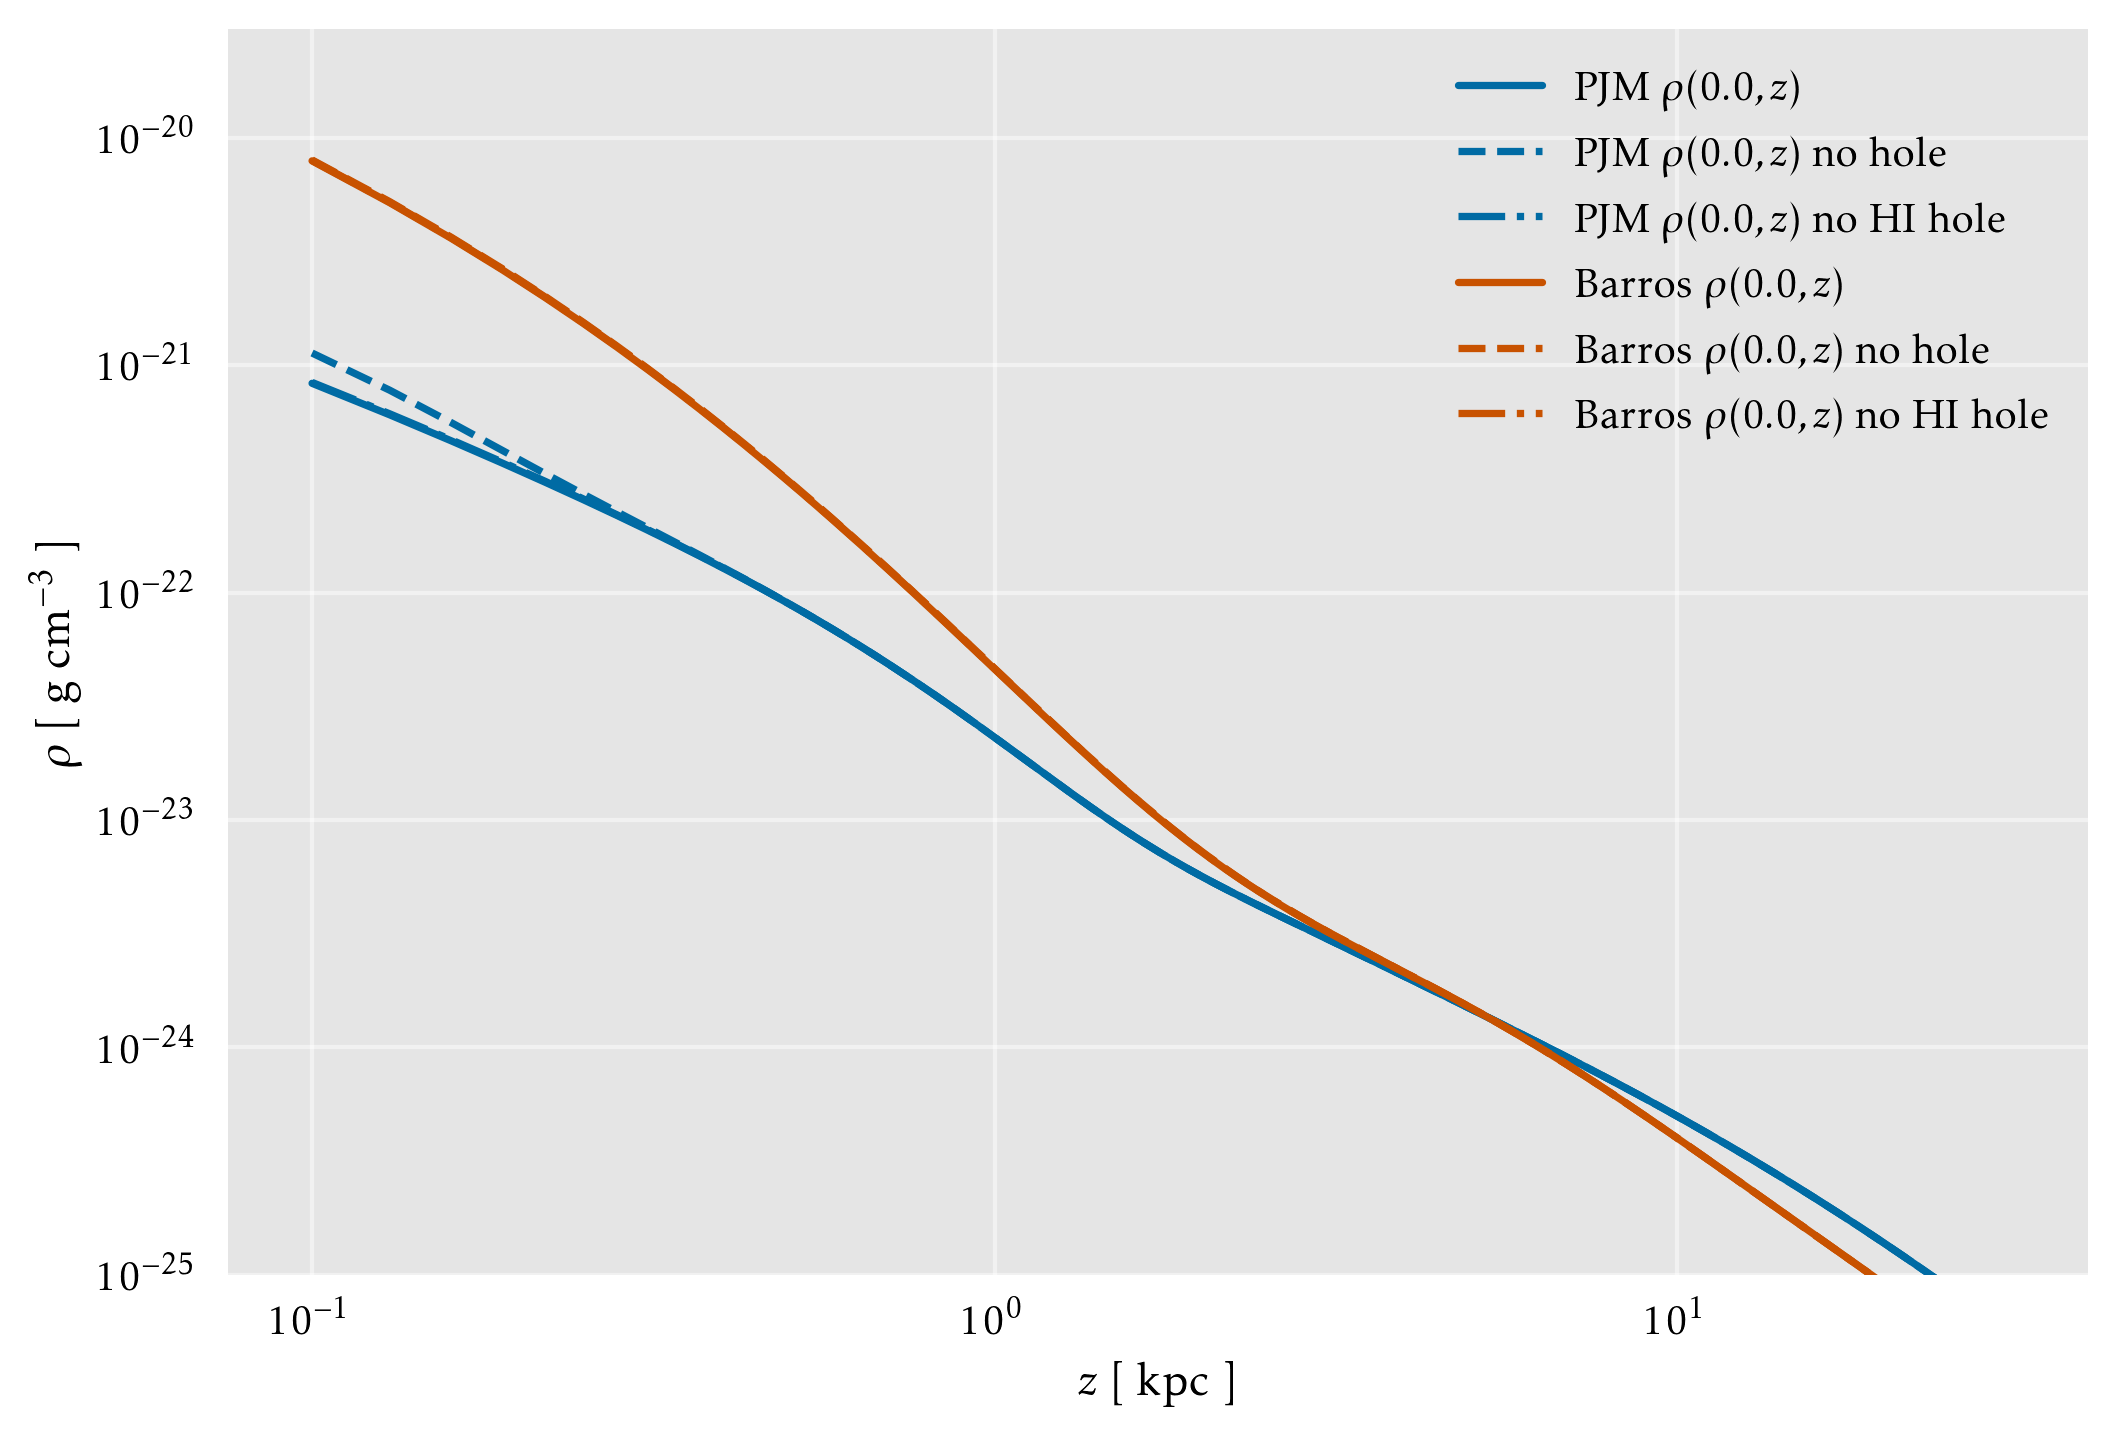

In [89]:
Rs = R0
plt.plot(z, PJM_Phi.Density(Rs, z) * nm.dens, c=c['pjm'], ls=ls['bf'], label=rf'PJM $\rho({Rs[0]}, z)$')
plt.plot(z, PJM_Phi_nh.Density(Rs, z) * nm.dens, c=c['pjm'], ls=ls['nh'], label=rf'PJM $\rho({Rs[0]}, z)$ no hole')
plt.plot(z, PJM_Phi_nHIh.Density(Rs, z) * nm.dens, c=c['pjm'], ls=ls['nHIh'], label=rf'PJM $\rho({Rs[0]}, z)$ no HI hole')
plt.plot(z, Bar_Phi.total_density(Rs, z) * nm.dens, c=c['bar'], ls=ls['bf'], label=rf'Barros $\rho({Rs[0]}, z)$')
plt.plot(z, Bar_Phi_nh.total_density(Rs, z) * nm.dens, c=c['bar'], ls=ls['nh'], label=rf'Barros $\rho({Rs[0]}, z)$ no hole')
plt.plot(z, Bar_Phi_nHIh.total_density(Rs, z) * nm.dens, c=c['bar'], ls=ls['nHIh'], label=rf'Barros $\rho({Rs[0]}, z)$ no HI hole')
plt.semilogy()
plt.loglog()
# plt.xlim(0, 1)
plt.ylim(1.e-25, 3.e-20)
plt.xlabel('$z$ [ kpc ]')
plt.ylabel(r'$\rho$ [ g cm$^{-3}$ ]')
plt.legend()
# plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1.0))
plt.show()


## Discs

### HI Disc

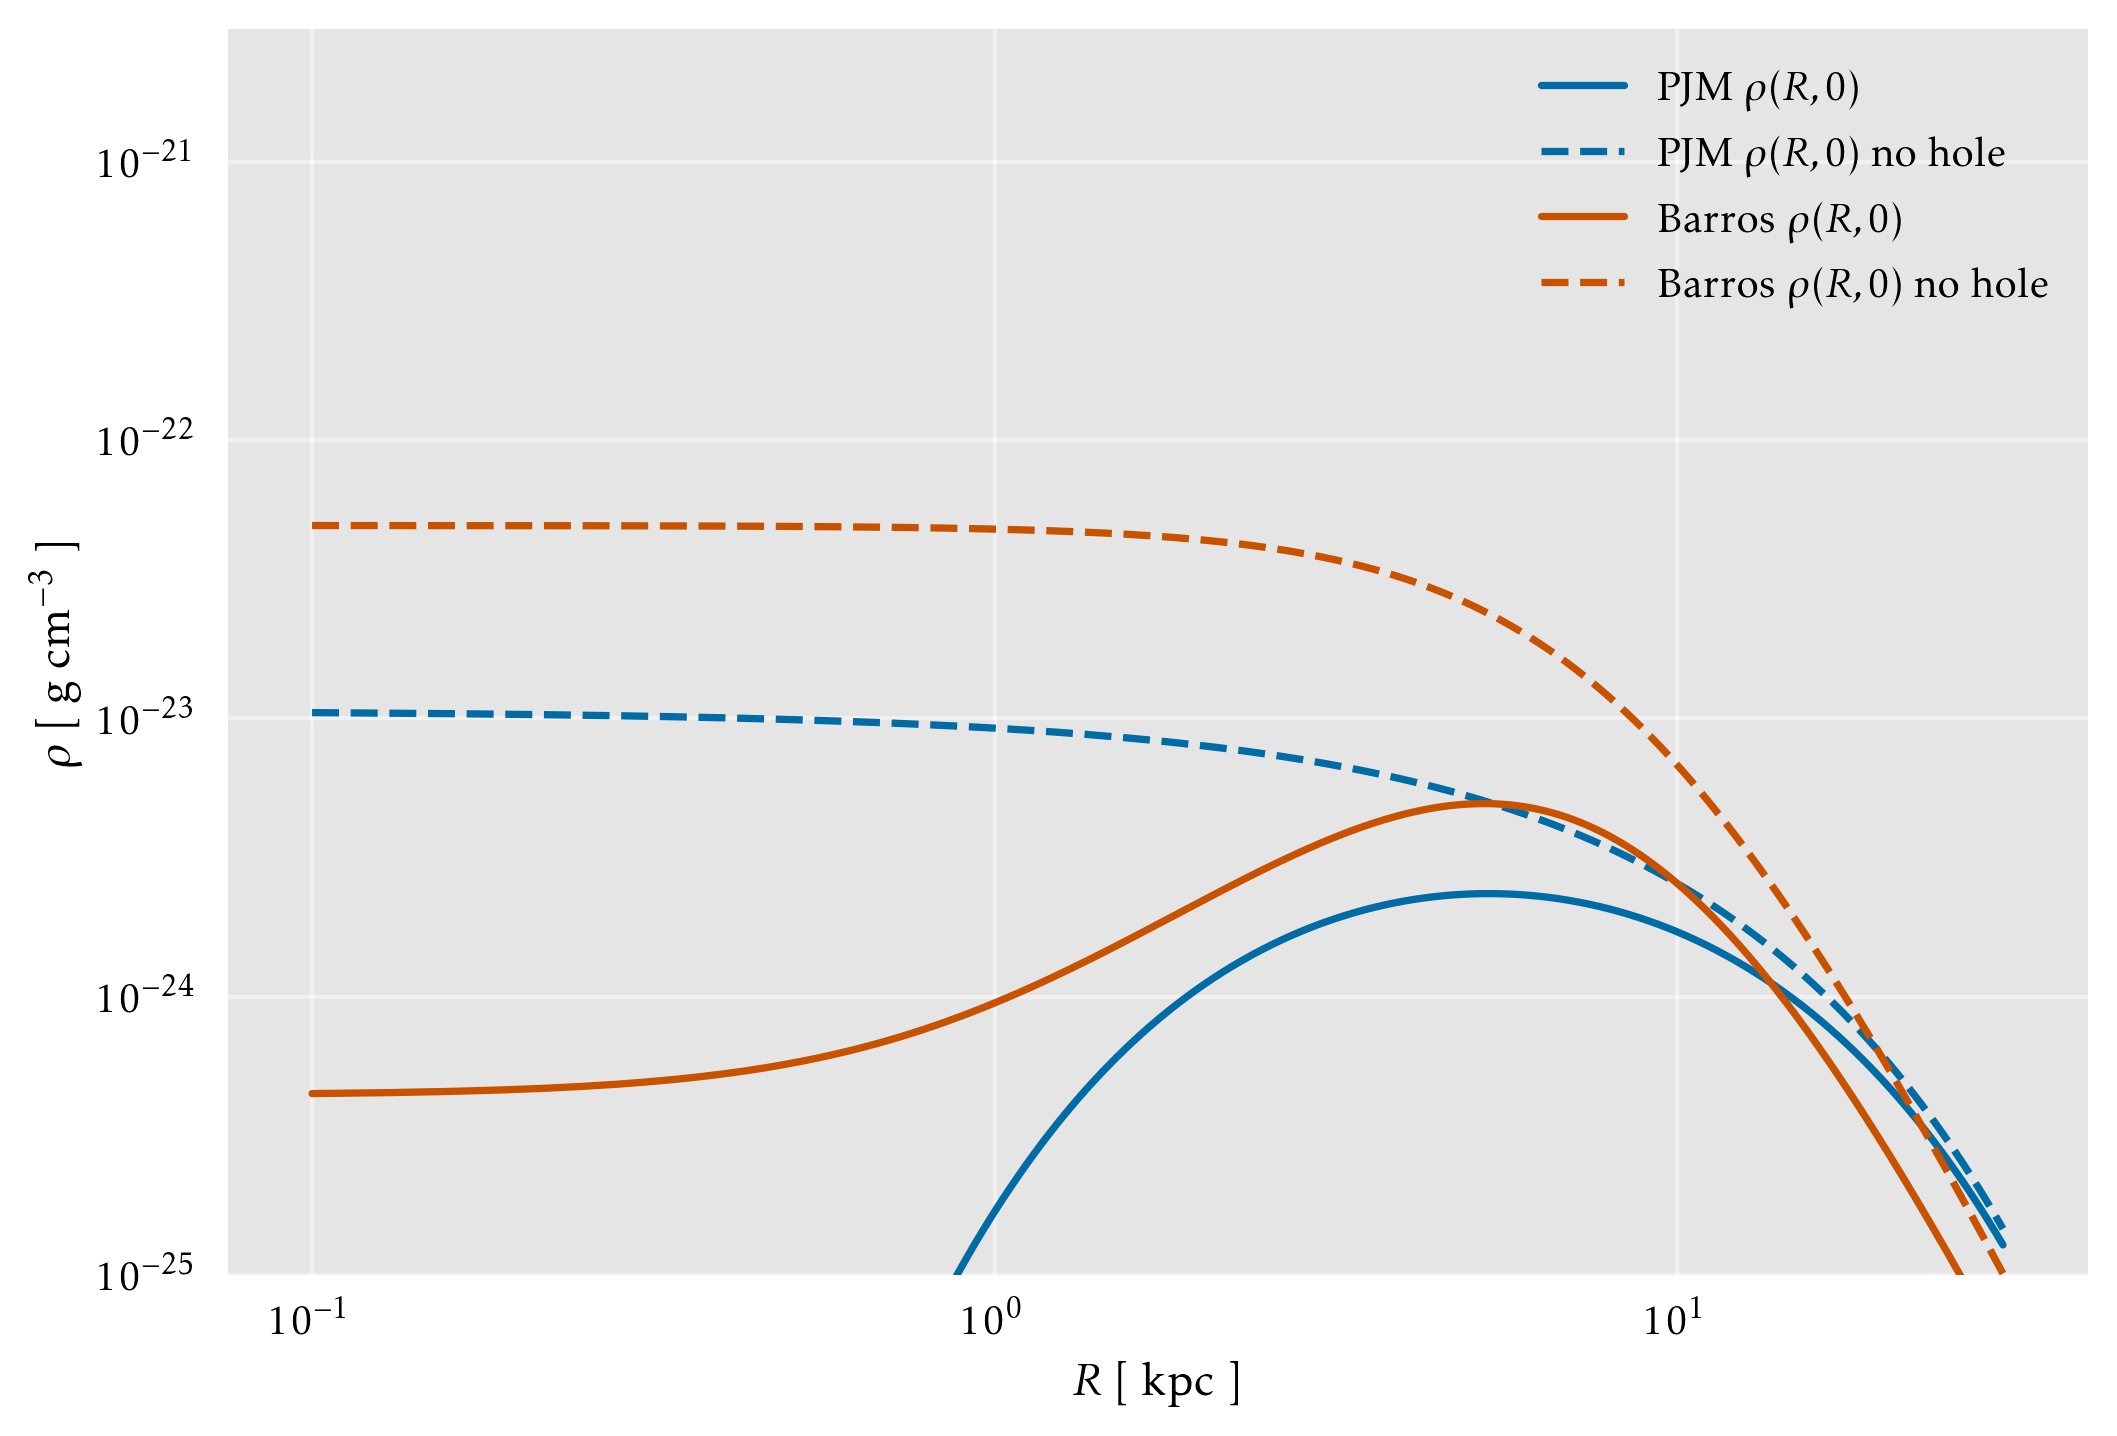

In [84]:
plt.plot(R, PJM_Rho.HI_disc(R, z0) * nm.dens, c=c['pjm'], ls=ls['bf'], label=r'PJM $\rho(R, 0)$')
plt.plot(R, PJM_Rho_nh.HI_disc(R, z0) * nm.dens, c=c['pjm'], ls=ls['nh'], label=r'PJM $\rho(R, 0)$ no hole')
plt.plot(R, Bar_Phi.HI_disc_density(R, z0) * nm.dens, c=c['bar'], ls=ls['bf'], label=r'Barros $\rho(R, 0)$')
plt.plot(R, Bar_Phi_nh.HI_disc_density(R, z0) * nm.dens, c=c['bar'], ls=ls['nh'], label=r'Barros $\rho(R, 0)$ no hole')
# plt.semilogy()
plt.loglog()
plt.ylim(1.e-25, 3.e-21)
plt.xlabel('$R$ [ kpc ]')
plt.ylabel(r'$\rho$ [ g cm$^{-3}$ ]')
plt.legend()
# plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1.0))
plt.show()

/home/ayw/dev/GalPot/PJM_functions.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return sigma0 * np.exp(-r0 / r - r / rd + eps * np.cos(np.pi * r / rd)) * dz
/home/ayw/dev/GalPot/PJM_functions.py:17: RuntimeWarning: invalid value encountered in true_divide
  return sigma0 * np.exp(-r0 / r - r / rd + eps * np.cos(np.pi * r / rd)) * dz


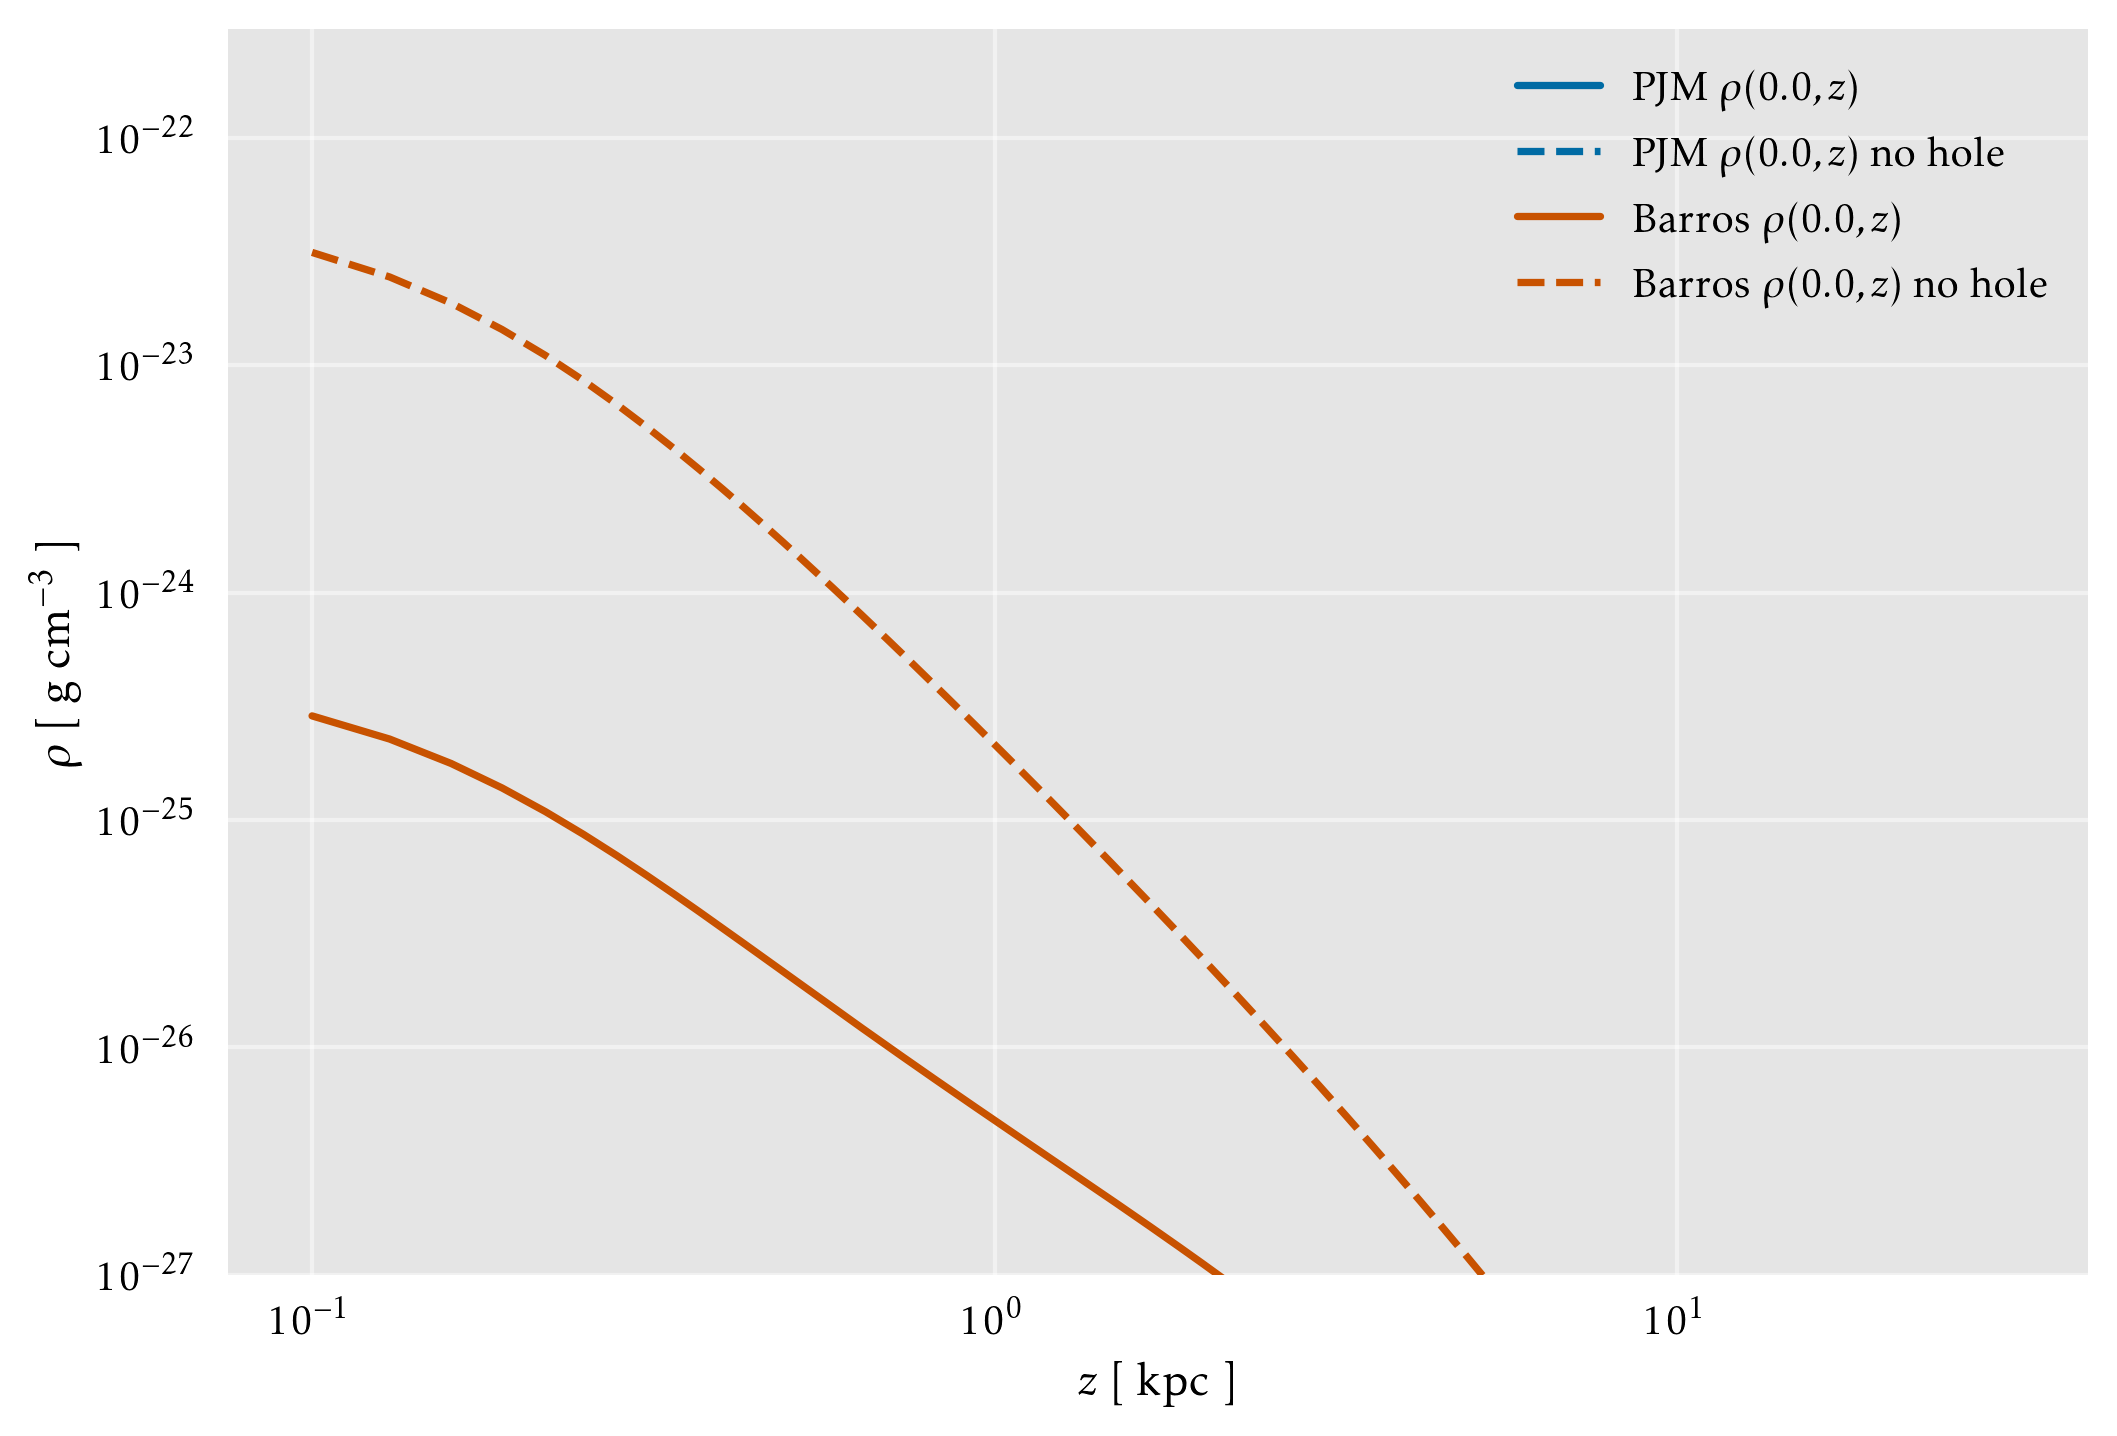

In [90]:
Rs = R0
plt.plot(z, PJM_Rho.HI_disc(Rs, z) * nm.dens, c=c['pjm'], ls=ls['bf'], label=rf'PJM $\rho({Rs[0]}, z)$')
plt.plot(z, PJM_Rho_nh.HI_disc(Rs, z) * nm.dens, c=c['pjm'], ls=ls['nh'], label=rf'PJM $\rho({Rs[0]}, z)$ no hole')
plt.plot(z, Bar_Phi.HI_disc_density(Rs, z) * nm.dens, c=c['bar'], ls=ls['bf'], label=rf'Barros $\rho({Rs[0]}, z)$')
plt.plot(z, Bar_Phi_nh.HI_disc_density(Rs, z) * nm.dens, c=c['bar'], ls=ls['nh'], label=rf'Barros $\rho({Rs[0]}, z)$ no hole')
plt.semilogy()
plt.loglog()
# plt.xlim(0, 1)
plt.ylim(1.e-27, 3.e-22)
plt.xlabel('$z$ [ kpc ]')
plt.ylabel(r'$\rho$ [ g cm$^{-3}$ ]')
plt.legend()
# plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1.0))
plt.show()

### H$_2$ disc

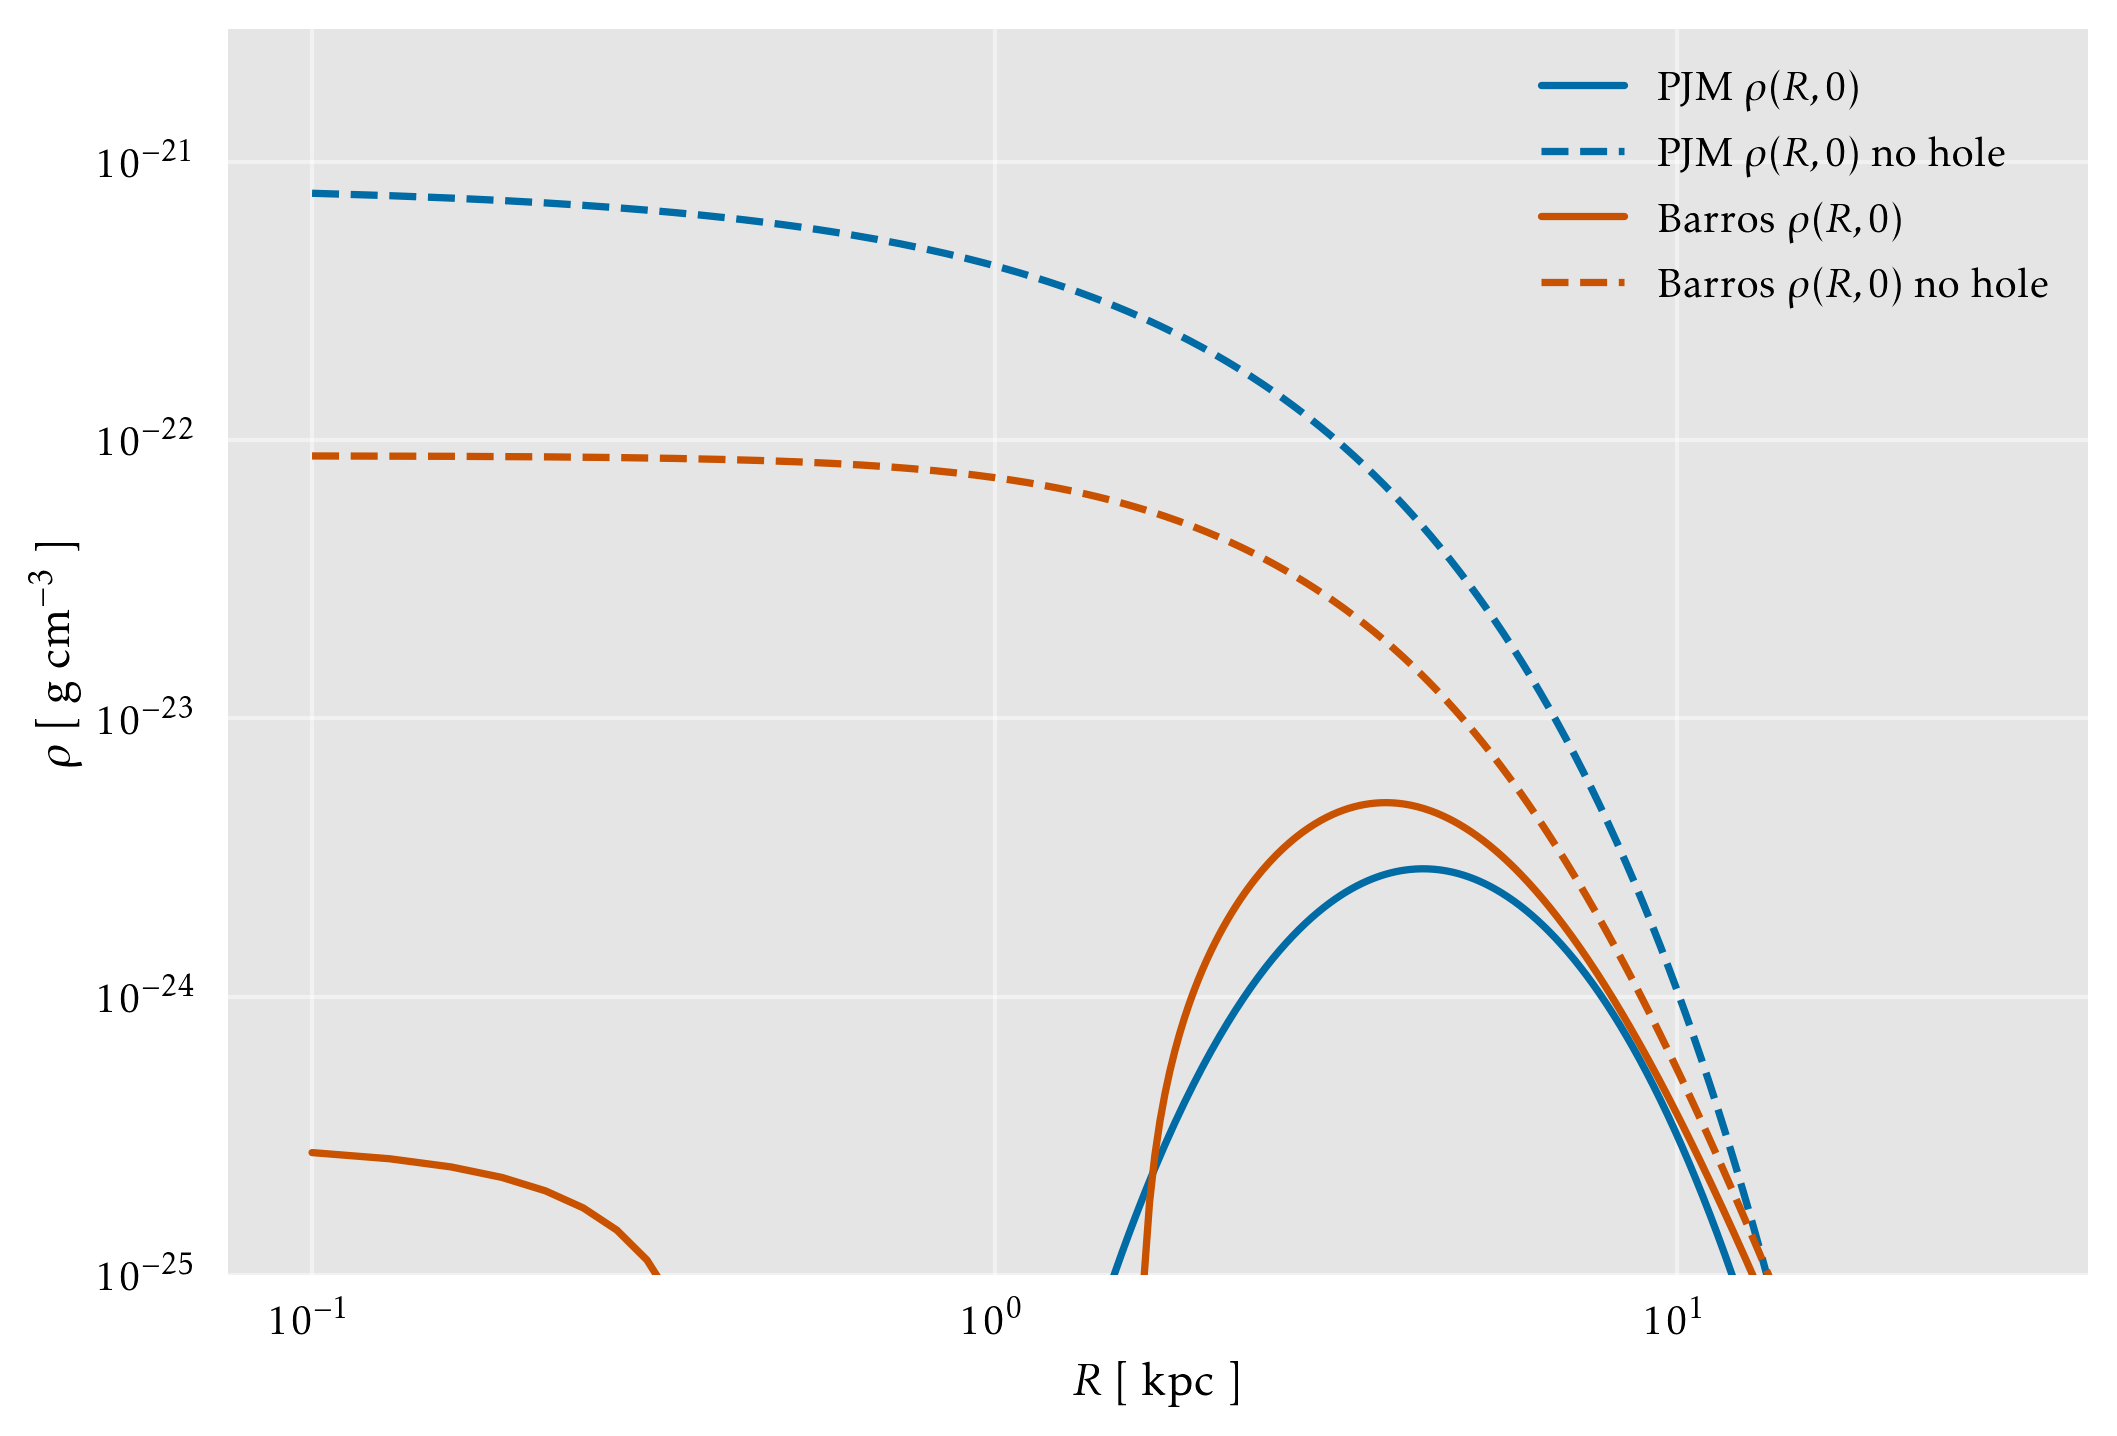

In [86]:
plt.plot(R, PJM_Rho.H2_disc(R, z0) * nm.dens, c=c['pjm'], ls=ls['bf'], label=r'PJM $\rho(R, 0)$')
plt.plot(R, PJM_Rho_nh.H2_disc(R, z0) * nm.dens, c=c['pjm'], ls=ls['nh'], label=r'PJM $\rho(R, 0)$ no hole')
plt.plot(R, Bar_Phi.H2_disc_density(R, z0) * nm.dens, c=c['bar'], ls=ls['bf'], label=r'Barros $\rho(R, 0)$')
plt.plot(R, Bar_Phi_nh.H2_disc_density(R, z0) * nm.dens, c=c['bar'], ls=ls['nh'], label=r'Barros $\rho(R, 0)$ no hole')
# plt.semilogy()
plt.loglog()
plt.ylim(1.e-25, 3.e-21)
plt.xlabel('$R$ [ kpc ]')
plt.ylabel(r'$\rho$ [ g cm$^{-3}$ ]')
plt.legend()
# plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1.0))
plt.show()

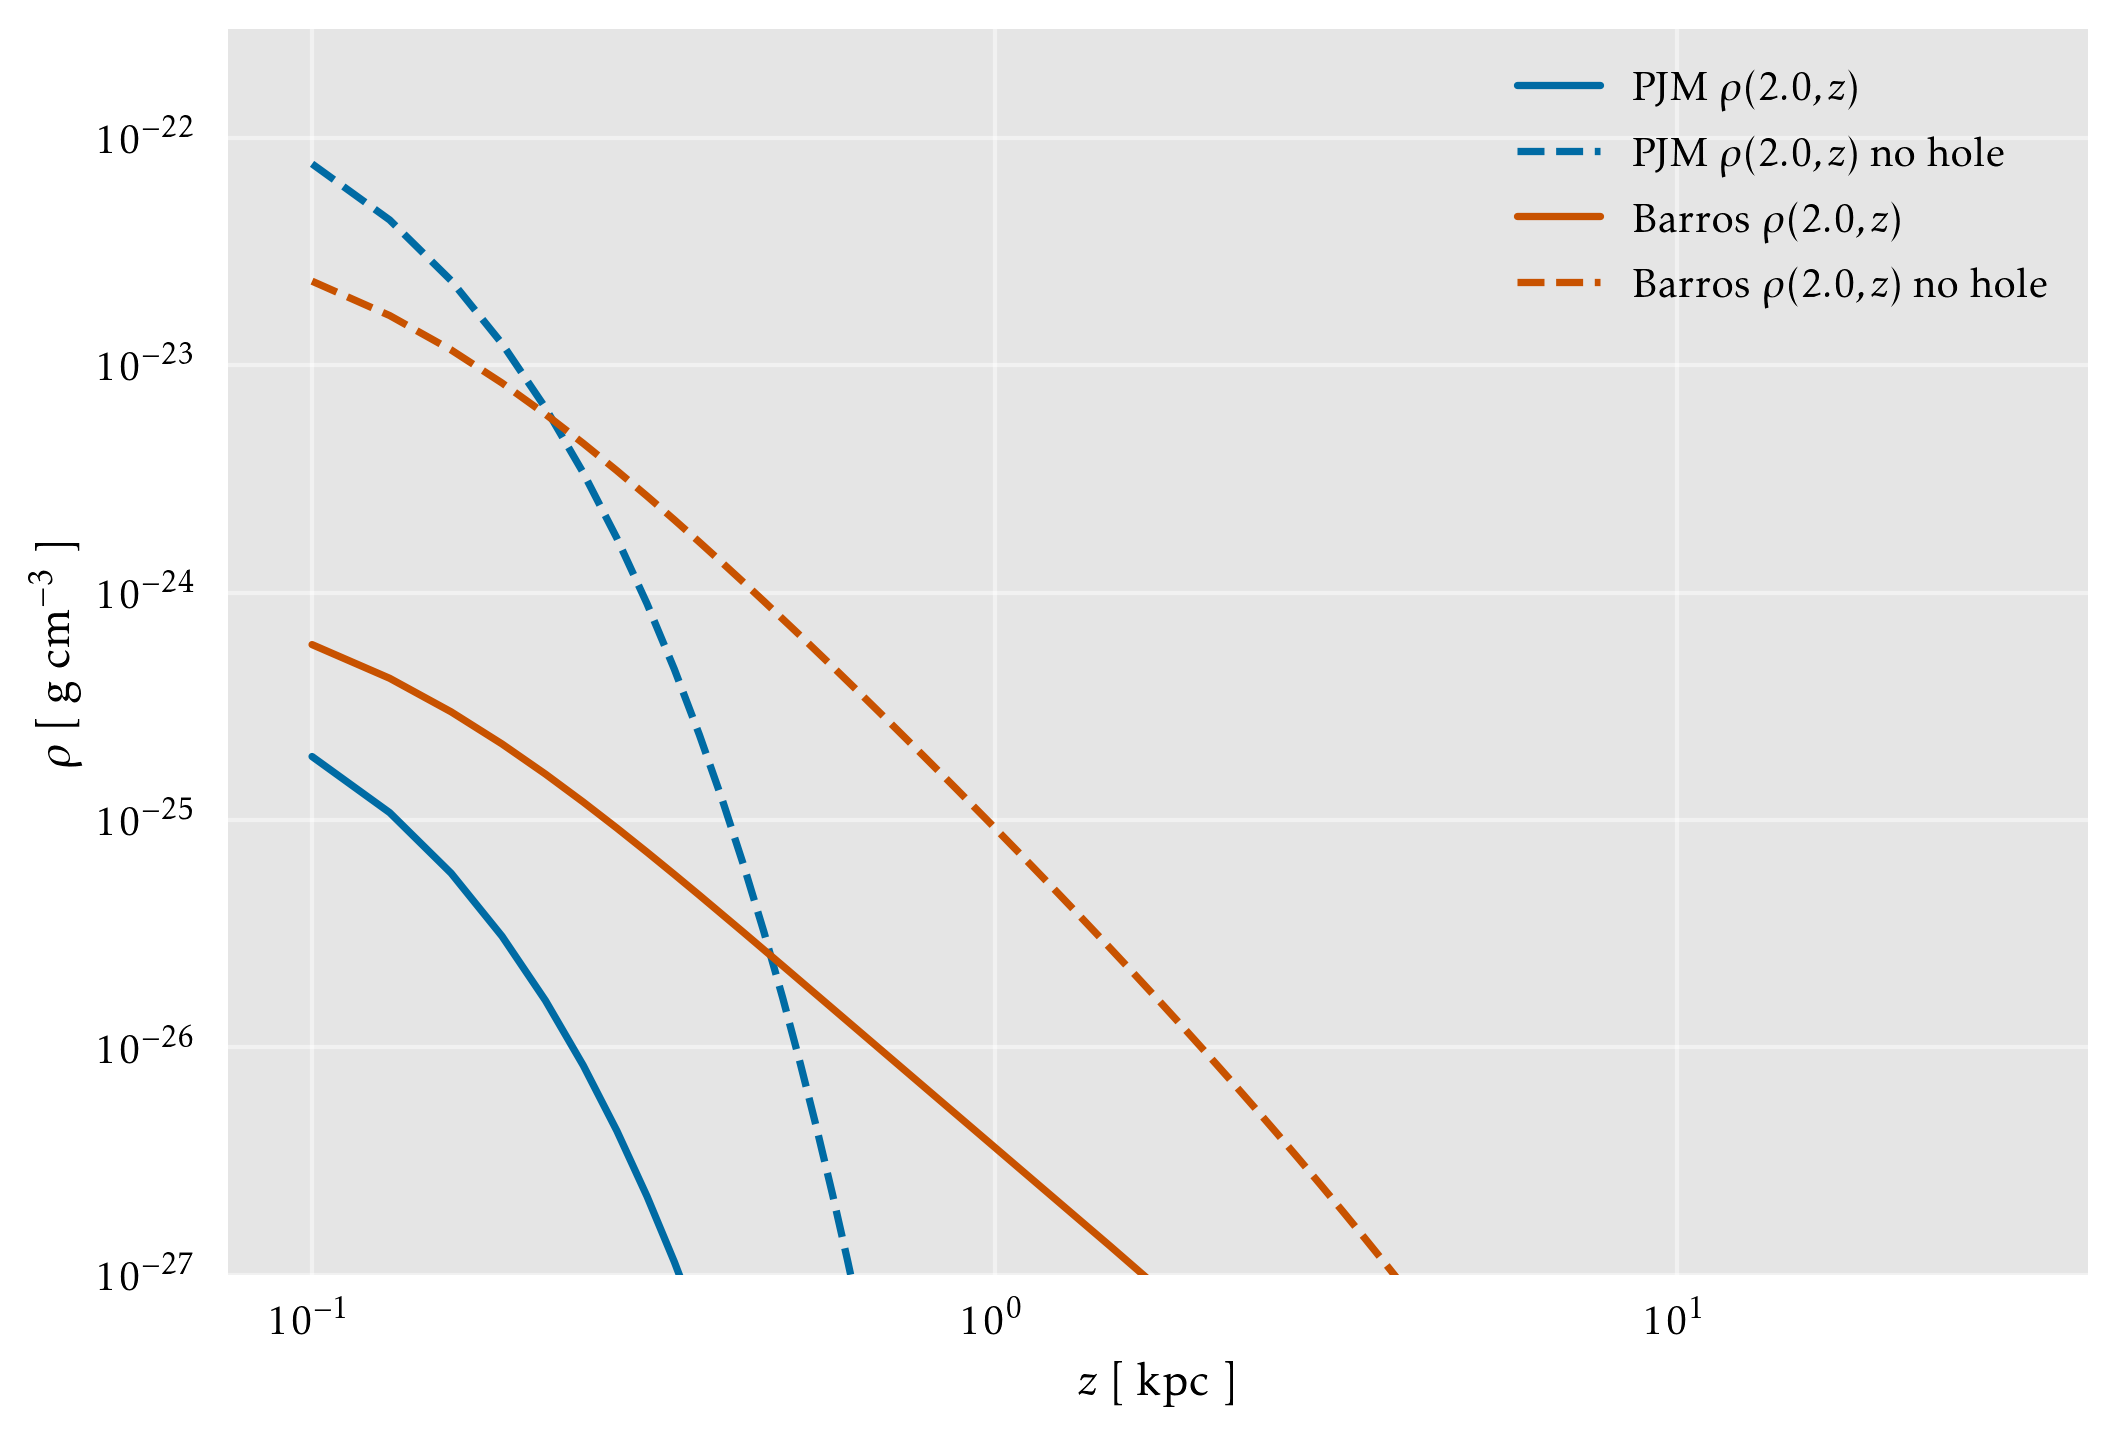

In [94]:
Rs = R2
plt.plot(z, PJM_Rho.H2_disc(Rs, z) * nm.dens, c=c['pjm'], ls=ls['bf'], label=rf'PJM $\rho({Rs[0]}, z)$')
plt.plot(z, PJM_Rho_nh.H2_disc(Rs, z) * nm.dens, c=c['pjm'], ls=ls['nh'], label=rf'PJM $\rho({Rs[0]}, z)$ no hole')
plt.plot(z, Bar_Phi.H2_disc_density(Rs, z) * nm.dens, c=c['bar'], ls=ls['bf'], label=rf'Barros $\rho({Rs[0]}, z)$')
plt.plot(z, Bar_Phi_nh.H2_disc_density(Rs, z) * nm.dens, c=c['bar'], ls=ls['nh'], label=rf'Barros $\rho({Rs[0]}, z)$ no hole')
plt.semilogy()
plt.loglog()
# plt.xlim(0, 1)
plt.ylim(1.e-27, 3.e-22)
plt.xlabel('$z$ [ kpc ]')
plt.ylabel(r'$\rho$ [ g cm$^{-3}$ ]')
plt.legend()
# plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1.0))
plt.show()